# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [11]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [33]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  url + "appid=" + weather_api_key + "&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | belaya gora
Processing Record 3 of Set 1 | narsaq
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | olinda
Processing Record 8 of Set 1 | ribeira grande
Processing Record 9 of Set 1 | nikolskoye
Processing Record 10 of Set 1 | chico
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | saint george
Processing Record 16 of Set 1 | sao miguel do araguaia
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 21 of Set 1 | sehwan


In [34]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
 

City          579
Lat           579
Lng           579
Max Temp      579
Humidity      579
Cloudiness    579
Wind Speed    579
Country       579
Date          579
dtype: int64

In [35]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,14.71,86,89,1.03,NZ,1680546976
1,belaya gora,68.5333,146.4167,-18.38,91,100,2.90,RU,1680547137
2,narsaq,60.9167,-46.0500,10.12,86,100,3.51,GL,1680547137
3,atuona,-9.8000,-139.0333,26.59,83,97,7.64,PF,1680547047
4,cape town,-33.9258,18.4232,17.84,83,0,2.57,ZA,1680546947


In [38]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [39]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,14.71,86,89,1.03,NZ,1680546976
1,belaya gora,68.5333,146.4167,-18.38,91,100,2.90,RU,1680547137
2,narsaq,60.9167,-46.0500,10.12,86,100,3.51,GL,1680547137
3,atuona,-9.8000,-139.0333,26.59,83,97,7.64,PF,1680547047
4,cape town,-33.9258,18.4232,17.84,83,0,2.57,ZA,1680546947


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

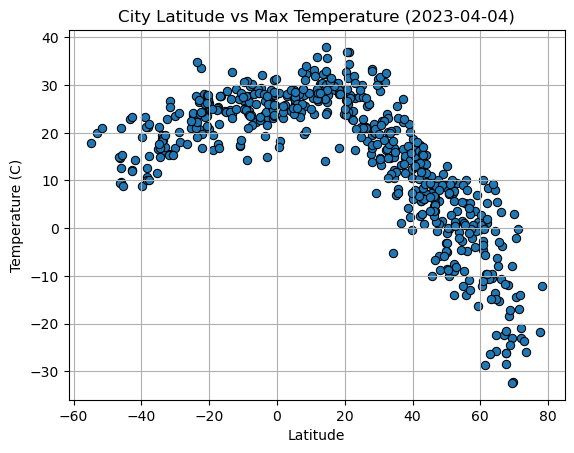

In [127]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Max Temperature (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()




#### Latitude Vs. Humidity

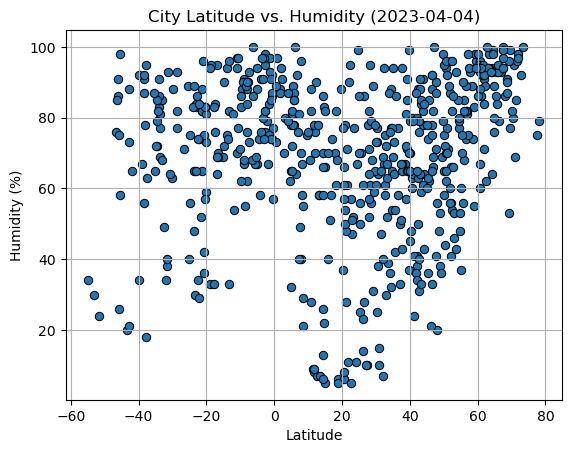

In [45]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs. Humidity (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

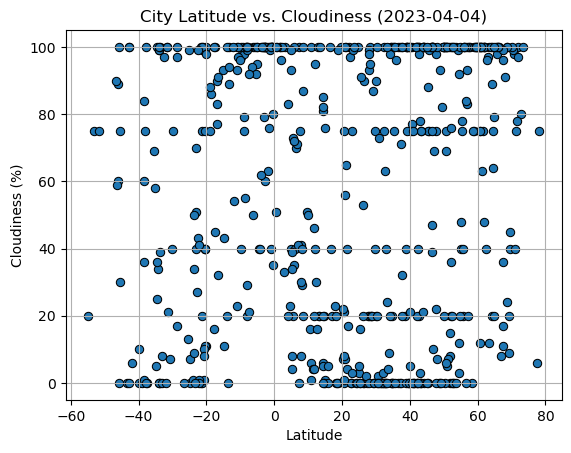

In [50]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs. Cloudiness (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

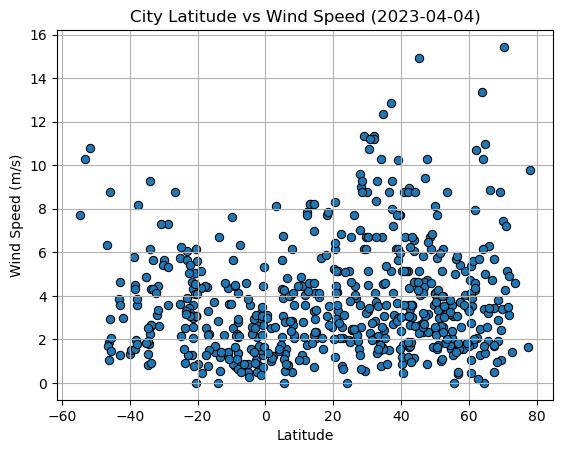

In [53]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)
plt.title("City Latitude vs Wind Speed (2023-04-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [128]:

# Define a function to create Linear Regression plots
# YOUR CODE HERE

def linear_regression(x_values,y_values,x,y):
    
    (slope, intercept, rvalues, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    print("The r-value is: " + str(rvalues))
    
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, xy =(x,y), fontsize = 15, color = "red")



In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,belaya gora,68.5333,146.4167,-18.38,91,100,2.90,RU,1680547137
2,narsaq,60.9167,-46.0500,10.12,86,100,3.51,GL,1680547137
7,ribeira grande,38.5167,-28.7000,16.54,67,20,6.17,PT,1680547138
8,nikolskoye,59.7035,30.7861,-0.05,95,100,4.05,RU,1680547139
9,chico,39.7285,-121.8375,12.34,37,0,7.72,US,1680547139


In [129]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mataura,-46.1927,168.8643,14.71,86,89,1.03,NZ,1680546976
3,atuona,-9.8000,-139.0333,26.59,83,97,7.64,PF,1680547047
4,cape town,-33.9258,18.4232,17.84,83,0,2.57,ZA,1680546947
5,ushuaia,-54.8000,-68.3000,17.81,34,20,7.72,AR,1680547016
6,olinda,-8.0089,-34.8553,29.85,62,20,4.12,BR,1680547138


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8713089053003147


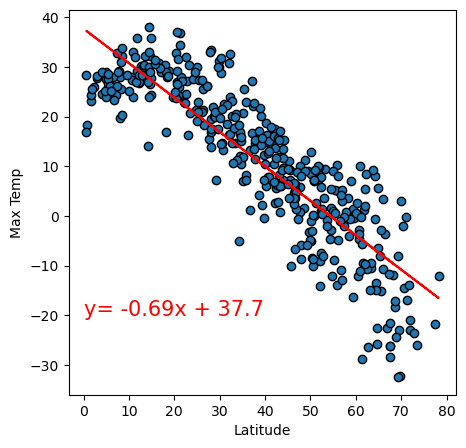

In [130]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plt.figure(figsize = (5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 0, -20)



The r-value is: 0.65087161940118


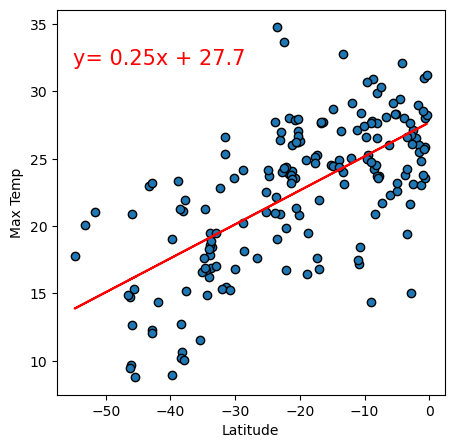

In [112]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plt.figure(figsize = (5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -55, 32)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

After analysing data, I discovered negative r-value for the Northern Hemisphere, which idenfies a strong negative correlation between latitude and max temperature. The equation showes that as latitude increases, the maximum temperature decreases. 

However, for the Southern Hemisphere I discovered positive r-value, which could suggests a moderate positive correlation between latitude and max temperature. Also, the equation shows us as latitude increases, the maximum temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3423002846567503


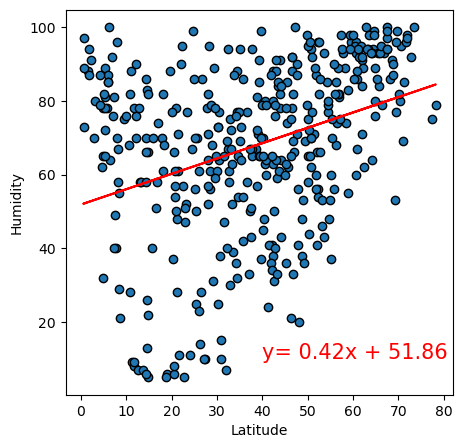

In [116]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, 40, 10)

The r-value is: 0.3174773479491788


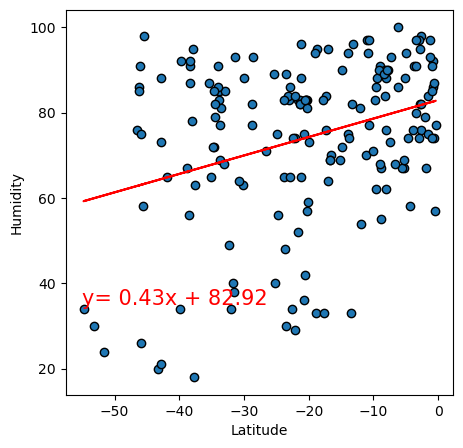

In [117]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plt.figure(figsize=(5,5))
plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, -55, 35)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

I have completed an analysis of the relationship between latitude and humidity.

I found that relationship between latitude and maximum temperature is not strong, it seems to be quite similar for both Northern and Southern Hemisphere.

Also, we have positive r-value for the Northern Hemisphere, which means a low positive correlation between latitude and humidity, as latitude increases, the humidity increases as well. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2326859487992564


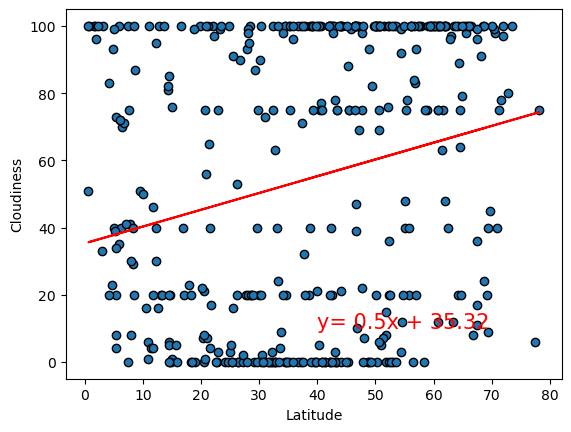

In [120]:
# Northern Hemisphere
# YOUR CODE HERE

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 40, 10)

The r-value is: 0.38437629726620404


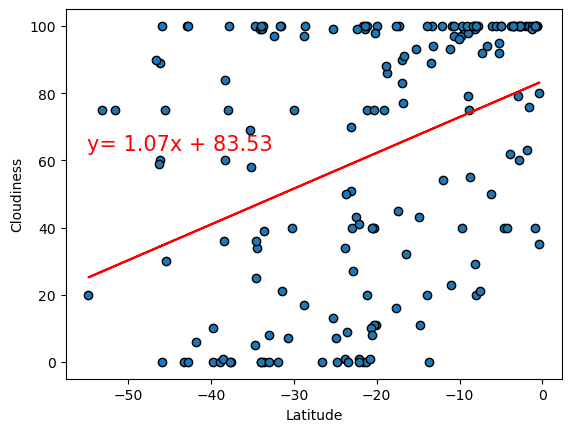

In [126]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -55, 63)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

I have completed an analysis of the relationship between latitude and cloudiness.

My data analysis showes that latitude and cloudiness has not a strong relationship between them. However, it has quite similar relationship for both Northern and Southern Hemisphere.

Also, we have positive r-value for the Northern Hemisphere, which means that we have a low positive correlation between latitude and cloudiness. When latitude increases, the cloudiness increases as well.

On other hand we have a positive r-value for the Southern Hemisphere as well, which suggests a similar, but slighly higher positive correlation between latitude and cloudiness. When latitude increases, the cloudiness increases as well.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.06360631974102733


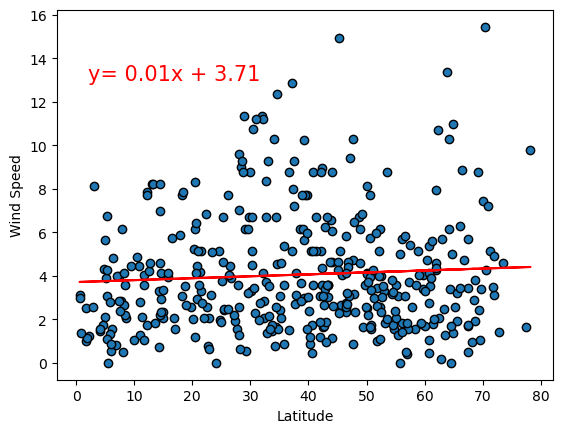

In [124]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]


plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values, y_values, marker="o", edgecolors="black")

linear_regression(x_values, y_values, 2, 13)

The r-value is: -0.35657135966881315


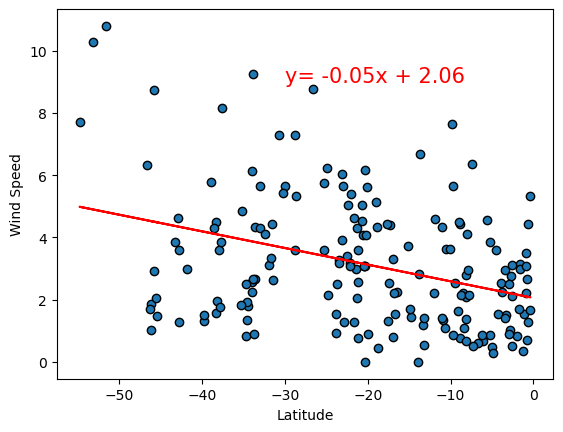

In [125]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plt.tight_layout()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.scatter(x_values,y_values,marker="o",edgecolors="black")

linear_regression(x_values, y_values, -30, 9)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

I have completed an analysis of the relationship between latitude and wind speed.

Data analysis shows that we have a relationship between latitude and wind speed, this relationship differs between the Northern - and Southern Hemisphere.

We have a positive r-value for the Northern Hemisphere which shows a weak positive correlation between latitude and wind speed. As latitude increases, the wind speed increases as well.
On other hand, we have a negative r-value for the Southern Hemisphere, which shows a low negative correlation between latitude and wind speed. As latitude increases, the wind speed decreases.